In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_path = "spam_Emails_data.csv"

# read csv file (make pandas DataFrame)
df = pd.read_csv(csv_path)
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [3]:
# Drop Duplicates / NaN Values

print(f"Length Original DataFrame: {len(df)}")
df = df.drop_duplicates()
df = df.dropna()
print(f"Length Updated DataFrame: {len(df)}")

Length Original DataFrame: 193852
Length Updated DataFrame: 193850


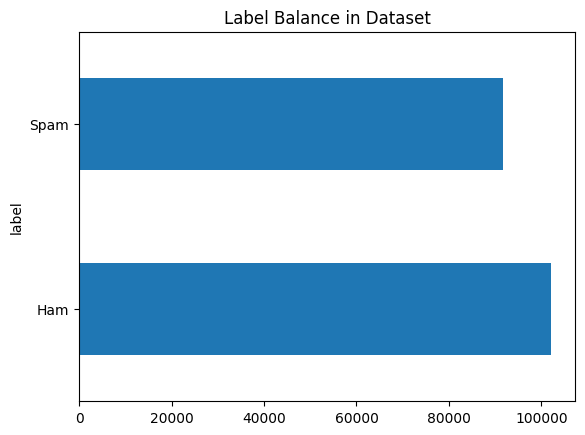

In [4]:
# plot Label Balance

df["label"].value_counts().plot(kind="barh", title="Label Balance in Dataset")
plt.show()

In [5]:
# convert label column to numeric

label_mapping = {'Ham': 0, 'Spam': 1}

df["label"] = df["label"].map(label_mapping)
df.head()

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [10]:
# shuffle DataFrame

df = df.sample(frac=1, random_state=42)
df.head()

,label,text
171986,1,skiing mothers extremely husband son national ...
77130,0,please be advised shelley will be canceling he...
191326,1,free shipping handling plus every cd is just e...
19385,0,houstonchronicle com news feb escapenumber esc...
152823,0,doubling the length of the data doubles the ap...


In [25]:
import random

# Print random Samples
def print_random_news(df):
    idx = random.randint(0, len(df) - 1)
    text = df.iloc[idx]
    news_type = 'Ham' if text['label'] == 0 else 'Spam'
    print(f"Label: {news_type}\n\nText: {text['text']}\n\n\n")

In [26]:
for i in range(4):
    print_random_news(df)

Label: Ham

Text: ken good thoughts lady church discussed pr needs attention john return path received rly yhescapenumber mx aol com rly yhescapenumber mail aol com escapenumber escapenumber escapenumber escapenumber air yhescapenumber mail aol com vescapenumber escapenumber esmtp id escapelong escapenumber wed escapenumber dec escapenumber escapenumber escapenumber escapenumber escapenumber received sjd nt sjd org mail sjd org escapenumber escapenumber escapenumber escapenumber rly yhescapenumber mx aol com vescapenumber escapenumber esmtp id escapelong escapenumber wed escapenumber dec escapenumber escapenumber escapenumber escapenumber escapenumber received dhcpescapenumber pdq net internet mail service escapenumber escapenumber escapenumber escapenumber id wed escapenumber dec escapenumber escapenumber escapenumber escapenumber escapenumber message id josie corning jhduncan aol com subject nytimes com article enron board comes storm criti cism date wed escapenumber dec escapenumber

In [28]:
from helper_cleaning import *

# get cleaned texts
df['clean_text'] = [
    remove_mult_spaces(
        filter_chars(
            clean_hashtags(
                strip_all_entities(
                    remove_emojis(text)
                )
            )
        )
    ) for text in df["text"].values
]

# get word counts for each text
df['text_len'] = [len(text.split()) for text in df["clean_text"].values]

In [29]:
df.head()

,label,text,clean_text,text_len
171986,1,skiing mothers extremely husband son national ...,skiing mothers extremely husband son national ...,13
77130,0,please be advised shelley will be canceling he...,please be advised shelley will be canceling he...,24
191326,1,free shipping handling plus every cd is just e...,free shipping handling plus every cd is just e...,502
19385,0,houstonchronicle com news feb escapenumber esc...,houstonchronicle com news feb escapenumber esc...,733
152823,0,doubling the length of the data doubles the ap...,doubling the length of the data doubles the ap...,248


In [32]:
# drop base text column

df = df.drop(["text"], axis=1)
df.head()

,label,clean_text,text_len
171986,1,skiing mothers extremely husband son national ...,13
77130,0,please be advised shelley will be canceling he...,24
191326,1,free shipping handling plus every cd is just e...,502
19385,0,houstonchronicle com news feb escapenumber esc...,733
152823,0,doubling the length of the data doubles the ap...,248


In [33]:
# switch column places

df = df[["clean_text", "label", "text_len"]]
df.head()

,clean_text,label,text_len
171986,skiing mothers extremely husband son national ...,1,13
77130,please be advised shelley will be canceling he...,0,24
191326,free shipping handling plus every cd is just e...,1,502
19385,houstonchronicle com news feb escapenumber esc...,0,733
152823,doubling the length of the data doubles the ap...,0,248


In [34]:
# reset index

df = df.reset_index()
df.head()

,index,clean_text,label,text_len
0,171986,skiing mothers extremely husband son national ...,1,13
1,77130,please be advised shelley will be canceling he...,0,24
2,191326,free shipping handling plus every cd is just e...,1,502
3,19385,houstonchronicle com news feb escapenumber esc...,0,733
4,152823,doubling the length of the data doubles the ap...,0,248


In [36]:
# drop unimportant column

df = df.drop(["index"], axis=1)
df.head()

,clean_text,label,text_len
0,skiing mothers extremely husband son national ...,1,13
1,please be advised shelley will be canceling he...,0,24
2,free shipping handling plus every cd is just e...,1,502
3,houstonchronicle com news feb escapenumber esc...,0,733
4,doubling the length of the data doubles the ap...,0,248


In [37]:
# save csv

df.to_csv("email_spam_prep.csv")

In [38]:
!mkdir csv_files

In [39]:
!mv email_spam_prep.csv csv_files

In [40]:
!mv spam_Emails_data.csv csv_files

In [2]:
csv = "./csv_files/email_spam_prep.csv"

# read preprocessed csv (generate pandas DataFrame)
df = pd.read_csv(csv)
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,clean_text,label,text_len
0,skiing mothers extremely husband son national ...,1,13
1,please be advised shelley will be canceling he...,0,24
2,free shipping handling plus every cd is just e...,1,502
3,houstonchronicle com news feb escapenumber esc...,0,733
4,doubling the length of the data doubles the ap...,0,248


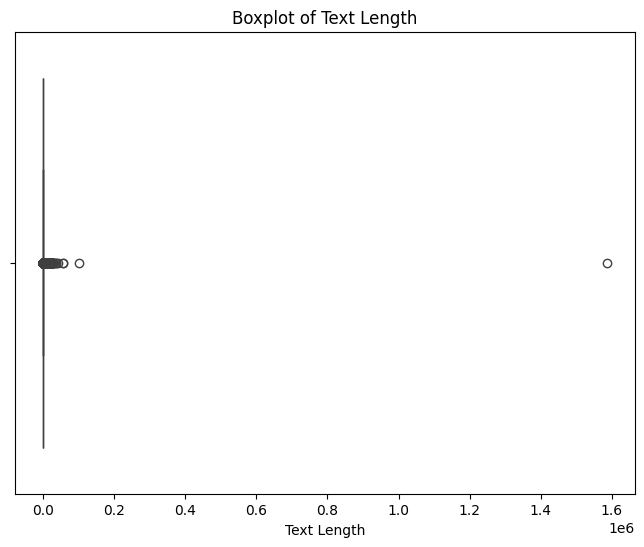

In [3]:
import seaborn as sns

# Show Word Count Balance
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["text_len"])
plt.title("Boxplot of Text Length")
plt.xlabel("Text Length")
plt.show()

In [4]:
# Sort Values (most word count at top)

df = df.sort_values(by="text_len", ascending=False)
df.head(5000)

,clean_text,label,text_len
133552,bodylabel 0subject great parttime summer job d...,0,1585483
95815,commit a snapshot of the generated prototype h...,0,101984
135928,here is your list of failed recipients request...,0,55725
73281,list failed recipients requested action taken ...,0,55479
87279,enron a wake up call the wall street journal e...,0,43000
...,...,...,...
3817,bill williams iii enron com bmm b b b b b b l ...,1,1224
66271,sun 16 jan 2005 06 43 40 0600 hot pick mnei fo...,1,1224
117286,cf fescapenumber eescapenumber eescapenumber e...,1,1224
106404,battle friends glory planters crunch time firs...,0,1224


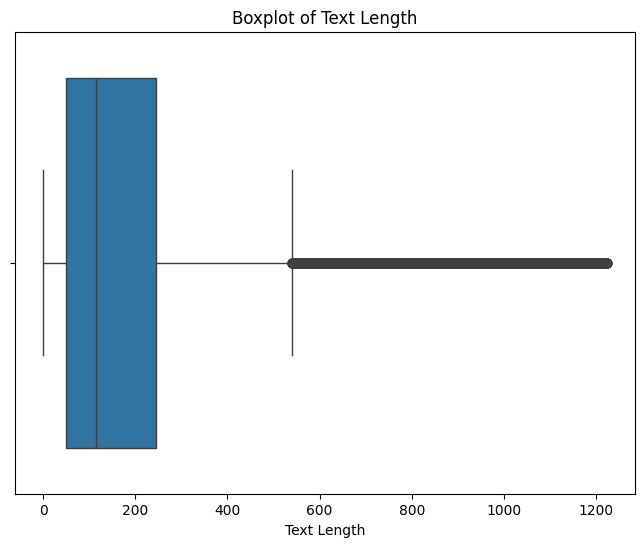

In [5]:
# clean the DataFrame

df = df[df["text_len"] < 1224]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["text_len"])
plt.title("Boxplot of Text Length")
plt.xlabel("Text Length")
plt.show()

In [6]:
# clean the DataFrame

df = df[df["text_len"] > 10]
df.tail()

,clean_text,label,text_len
14797,nineteen want wanted herself through accept di...,1,11
169987,genially ah dedalus said smiling presented wit...,1,11
186969,bescapenumber eescapenumber escapenumber bb fe...,1,11
122524,td h grahpv lftyxw ufef grxt ws oe dum bhhksua...,1,11
50875,want escapelong vicodescapenumbern oxycodone h...,1,11


In [8]:
# shuffle DataFrame

df = df.sample(frac=1, random_state=42)
df.head()

,clean_text,label,text_len
164766,for testing the permutation test may be prefer...,0,862
39216,meeting referenced scheduled follows date frid...,0,30
133179,lou can you please send me the enron table nam...,0,19
188583,legendary one one service click away contact n...,1,43
56993,hi sally am assuming you got the ou stickers f...,0,229


In [9]:
print(f"Length Updated DataFrame: {len(df)}")

Length Updated DataFrame: 181156


In [10]:
from sklearn.model_selection import train_test_split

# feature and target
X = df["clean_text"]
y = df["label"]

# train, test split (evaluation model on unseen data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Mini Training Set

X_train_mini = X_train[:5000]
y_train_mini = y_train[:5000]

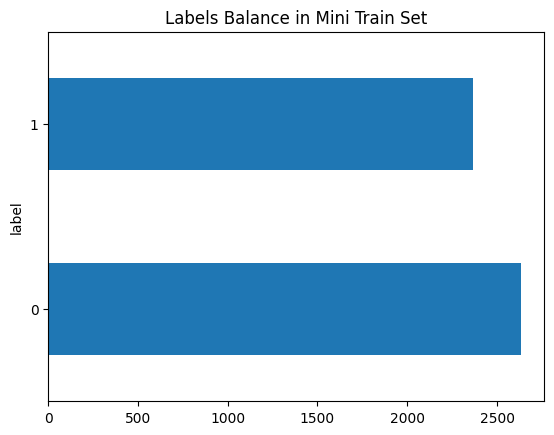

In [12]:
# Show Target Balance in Mini Train Set

y_train_mini.value_counts().plot(kind="barh", title="Labels Balance in Mini Train Set")
plt.show()

Pipeline 1: CountVectorizer | MultinomialNB, Accuracy: 0.9548
Pipeline 2: TfidfVectorizer | MultinomialNB, Accuracy: 0.9322
Pipeline 3: CountVectorizer | TfidfTransformer | MultinomialNB, Accuracy: 0.9322
Pipeline 4: CountVectorizer | SVC, Accuracy: 0.8920
Pipeline 5: TfidfVectorizer | SVC, Accuracy: 0.9636
Pipeline 6: CountVectorizer | TfidfTransformer | SVC, Accuracy: 0.9636
Pipeline 7: CountVectorizer | RandomForestClassifier, Accuracy: 0.9386
Pipeline 8: TfidfVectorizer | RandomForestClassifier, Accuracy: 0.9492
Pipeline 9: CountVectorizer | TfidfTransformer | RandomForestClassifier, Accuracy: 0.9486
Pipeline 10: CountVectorizer | GradientBoostingClassifier, Accuracy: 0.9190
Pipeline 11: TfidfVectorizer | GradientBoostingClassifier, Accuracy: 0.9190
Pipeline 12: CountVectorizer | TfidfTransformer | GradientBoostingClassifier, Accuracy: 0.9188
Pipeline 13: CountVectorizer | PassiveAggressiveClassifier, Accuracy: 0.9476
Pipeline 14: TfidfVectorizer | PassiveAggressiveClassifier, Accu

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The defaul

Pipeline 34: CountVectorizer | LinearSVC, Accuracy: 0.9412


/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Pipeline 35: TfidfVectorizer | LinearSVC, Accuracy: 0.9682


/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Pipeline 36: CountVectorizer | TfidfTransformer | LinearSVC, Accuracy: 0.9682
Pipeline 37: CountVectorizer | Perceptron, Accuracy: 0.9350
Pipeline 38: TfidfVectorizer | Perceptron, Accuracy: 0.9510
Pipeline 39: CountVectorizer | TfidfTransformer | Perceptron, Accuracy: 0.9510


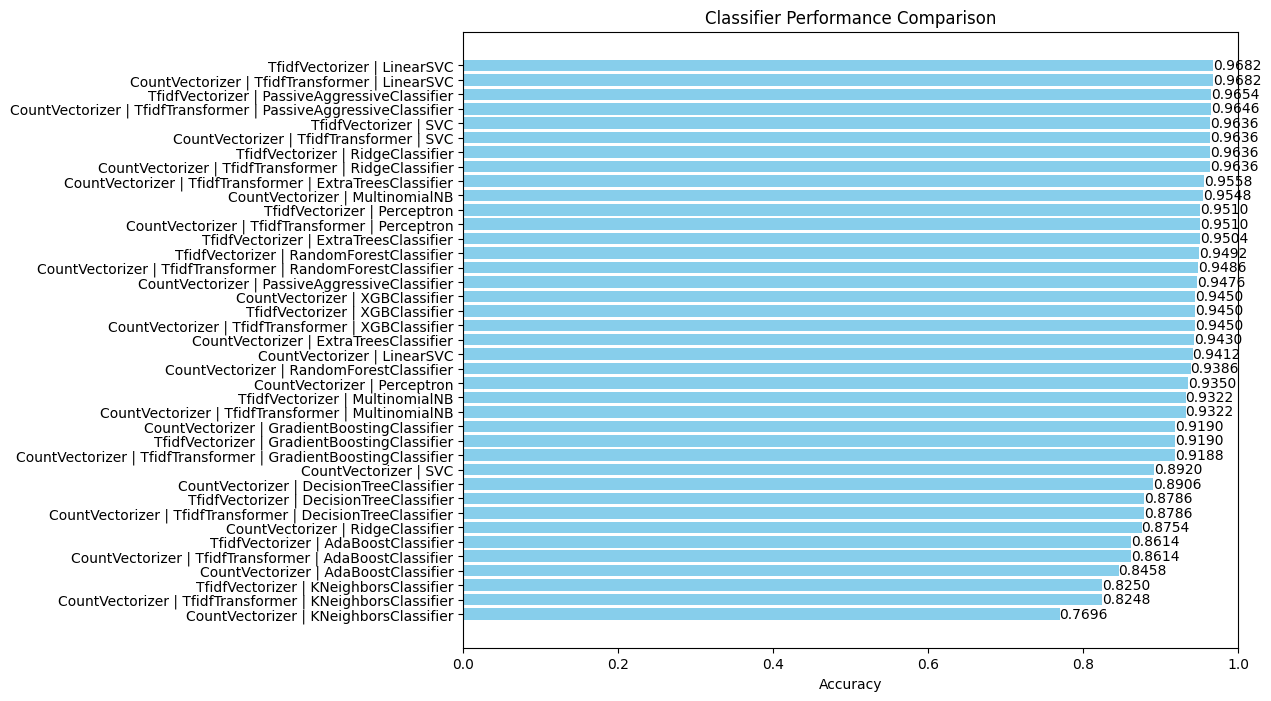

In [13]:
from helper_pipeline import compare_pipelines
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold (because unbalanced targets)
cv = StratifiedKFold(n_splits=5)

# compare pipelines (helper_pipeline.py)
compare_pipelines(X_train=X_train_mini, y_train=y_train_mini, cv=cv)

In [18]:
from helper_pipeline import *

# fit best pipeline with complete Training Set
best_pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("clf", LinearSVC())])
best_pipeline.fit(X_train, y_train)

/home/ubuntu/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
# predict on Test Set

y_pred = best_pipeline.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report


# get accuracy score
acc_score = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f"{acc_score:.4f}")

0.9912


In [21]:
# get classification report

print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24001
           1       0.99      0.99      0.99     21288

    accuracy                           0.99     45289
   macro avg       0.99      0.99      0.99     45289
weighted avg       0.99      0.99      0.99     45289



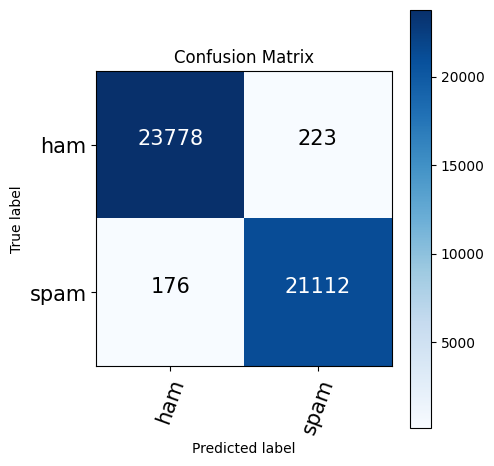

In [22]:
from helper_evaluation import make_confusion_matrix

classes = ["ham", "spam"]

make_confusion_matrix(y_pred=y_pred, y_true=y_test, figsize=(5, 5), classes=classes)